In [36]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.

Mobile Games AB Testing with Cookie Cats

In [13]:
df= pd.read_csv('результаты А_B - cookie_cats 2.csv')
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1
...,...,...,...,...,...
90184,9999441,gate_40,97,1,0
90185,9999479,gate_40,30,0,0
90186,9999710,gate_30,28,1,0
90187,9999768,gate_40,51,1,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [15]:
df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


In [16]:
df["userid"].count() == df["userid"].nunique()

True

Повторяющихся пользователей нет

*Количество пользователй в каждой группе* 

In [18]:
df.groupby("version")[["userid"]].nunique()

,userid
version,
gate_30,44700
gate_40,45489


В каждой группе примерно одинаковое количество игроков

In [19]:
plot_df = df.groupby('sum_gamerounds').count().reset_index()
plot_df.head()

,sum_gamerounds,userid,version,retention_1,retention_7
0,0,3994,3994,3994,3994
1,1,5538,5538,5538,5538
2,2,4606,4606,4606,4606
3,3,3958,3958,3958,3958
4,4,3629,3629,3629,3629


In [37]:
df.query('version == "gate_30" and retention_1 == False').sum_gamerounds
display(stats.kstest(df.sum_gamerounds, 'norm'))
display(stats.kstest(df.sum_gamerounds, 'expon'))
display(stats.kstest(df.sum_gamerounds, 'binom', args=(1500, 0.16)))

KstestResult(statistic=0.8715607041848303, pvalue=0.0, statistic_location=2, statistic_sign=-1)

KstestResult(statistic=0.7934532380996653, pvalue=0.0, statistic_location=3, statistic_sign=-1)

KstestResult(statistic=0.9398360749415627, pvalue=0.0, statistic_location=200, statistic_sign=1)

Статистических различий нет

**График распределения игроков**

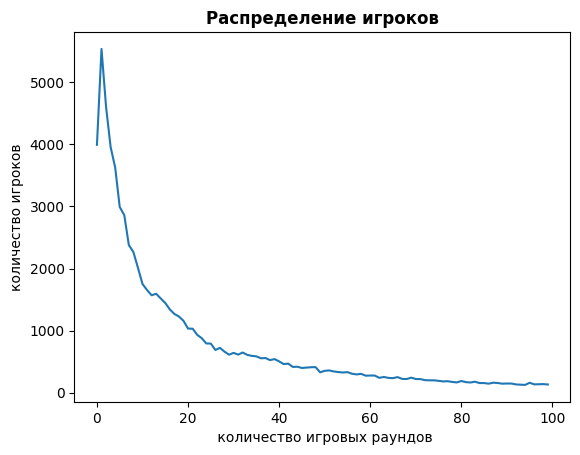

In [22]:
plot_df = df.groupby("sum_gamerounds")["userid"].count()
ax = plot_df.head(100).plot()
plt.title("Распределение игроков", fontweight="bold", )
plt.xlabel(" количество игровых раундов", )
plt.ylabel("количество игроков", )
plt.show()

По графику видно, что некоторые игроки устанавливают игру, но затем никогда в нее не играют (0 игровых раундов), некоторые игроки  играют несколько игровых раундов .

Количество тех, кто установил игру, но никогда не играл

In [23]:
df.query("sum_gamerounds == 0").userid.count()

3994

Среднее значение тех, кто вернулся в игру после 1 дня и после 7 дня 

In [26]:
df[['retention_1','retention_7']].mean()*100

retention_1    44.520950
retention_7    18.606482
dtype: float64

 44.52% возвращаются после первого дня, а 18.61% возвращаются  после 7 дня после установки

In [27]:
data.groupby('version')[['retention_1','retention_7']].mean()*100

,retention_1,retention_7
version,,
gate_30,44.818792,19.020134
gate_40,44.228275,18.200004


Разница между группами для 1-дневного и 7-дневного показывает, что есть небольшое снижение.Т.е. показатели у gate_40 ниже, чем у gate_30

In [44]:
boot_1d = []
boot_7d = []
for i in range(1000):
    boot_mean_1 = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_mean_7 = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_1d.append(boot_mean_1)
    boot_7d.append(boot_mean_7)
    
boot_1d = pd.DataFrame(boot_1d)
boot_7d = pd.DataFrame(boot_7d)

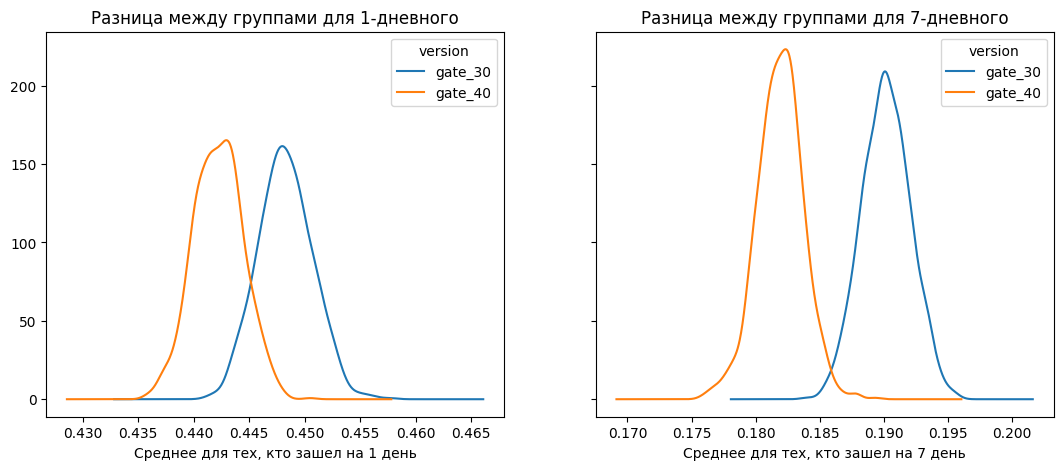

In [45]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(13,5))

boot_1d.plot.kde(ax=ax1)
ax1.set_title('Разница между группами для 1-дневного')
ax1.set_xlabel('Среднее для тех, кто зашел на 1 день');
ax1.set_ylabel("",size=12)

boot_7d.plot.kde(ax=ax2)
ax2.set_title('Разница между группами для 7-дневного')
ax2.set_xlabel('Среднее для тех, кто зашел на 7 день');

По графикам также видно, что происходит небольшое снижение на gate_40, чем на gate_30 после одного дня. Также есть небольшое снижение и после 7 дня. Т.е. показатели у gate_40 ниже, чем у gate_30

In [47]:
boot_1d['diff'] = ((boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40'] * 100)
boot_7d['diff'] = ((boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100)

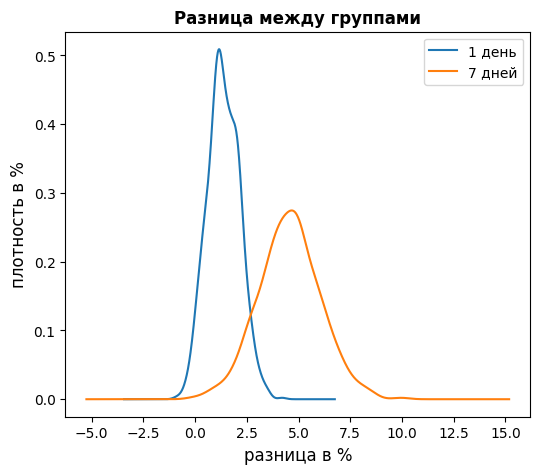

In [51]:
fig, (ax1) = plt.subplots(1, 1,figsize=(6,5))

boot_1d['diff'].plot.kde(ax=ax1, label = "1 день")
boot_7d['diff'].plot.kde(ax=ax1, label = "7 дней")
ax1.set_xlabel("разница в %",size=12)
ax1.set_ylabel("плотность в %",size=12)
ax1.set_title("Разница между группами", fontweight="bold", )
plt.legend()
plt.show()

Из этого графика видно, что наиболее вероятная разница составляет около 1% - 2% для х1 дня. Для 7-дней наиболее вероятная разница составляет около 2% - 5%. Причем большая часть распределения выше 0%, в пользу gate_30.

# Вывод:
При gate_30 удержание выше как однодневное , так и семидневное, чем у gate_40 и так как удержание  является одним из самых важных показателей, то не нужно менять размещение ворот с уровня 30 на уровень 40, это только уменьшает удержание игроков.

